## Vergleich zwischen den Schalen der Pikunda-Munda-Gruppe und denen der Mobaka-Gruppe

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Wandungsdicke

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Wandung,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Form_Gef) Like '%G1a%')
           AND ((t_Obj.Typ) Like '%PIKMUN%'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
df1['Wandung'] = df1['Wandung'].convert_objects(convert_numeric=True)

sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Wandung,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Form_Gef) Like '%G1a%')
           AND ((t_Obj.Typ) Like '%MKA%'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)
df2['Wandung'] = df2['Wandung'].convert_objects(convert_numeric=True)

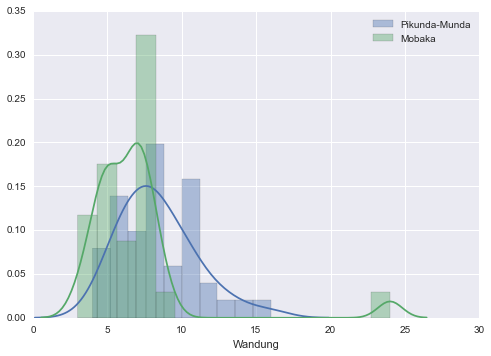

In [3]:
df1a = df1['Wandung'].dropna()
df2a = df2['Wandung'].dropna()
# Plot:
sns.distplot(df1a, rug = False, label="Pikunda-Munda", bins = 10)
sns.distplot(df2a, rug = False, label="Mobaka")
plt.legend()
plt.show()

## Gefäßdimensionen

In [4]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Form_Gef) Like '%G1a%')
           AND ((t_Obj.Typ) Like '%PIKMUN%')
           OR ((t_Obj.Typ) Like '%MKA%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

display(df.head())

,ort_kurz,ort_name,objID,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,Typ,Form_Gef
0,MUN,Munda,333,19.0,14,17.0,10.0,17.5,3.0,0,PIKMUN,G1a
1,MUN,Munda,337,20.0,12,17.5,9.0,18.0,5.0,0,PIKMUN,G1a
2,MUN,Munda,345,24.5,15,21.5,10.5,22.5,3.5,0,PIKMUN,G1a
3,MUN,Munda,428,22.0,14,18.5,10.5,20.0,2.5,0,PIKMUN,G1a
4,MUN,Munda,434,NaN,NaN,16.0,6.0,18.0,2.0,0,PIKMUN,G1a


> **ToDo**

## Verzierungselemente

In [5]:
sql = """SELECT
           t_Obj.objID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_Obj.Form_Gef) Like '%G1a%')
           AND ((t_K_Verz.verzName) Like 'V%')
           AND ((t_Obj.Typ) Like '%PIKMUN%'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)

sql = """SELECT
           t_Obj.objID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_Obj.Form_Gef) Like '%G1a%')
           AND ((t_K_Verz.verzName) Like 'V%')
           AND ((t_Obj.Typ) Like '%MKA%'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)

In [6]:
df1_pivot = df1.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
# df1_pivot

In [7]:
# Standart-Plot-Einstellungen von Matplotlib
plt.rcdefaults()
%matplotlib inline

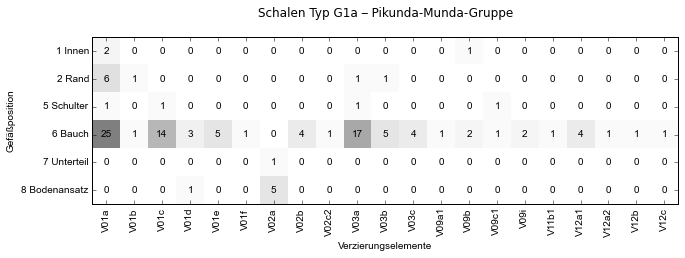

In [8]:
fig = plt.figure()
fig.set_size_inches(20, 3)
plt.imshow(df1_pivot, interpolation='nearest', cmap='binary', alpha = .5)
plt.title('Schalen Typ G1a – Pikunda-Munda-Gruppe\n')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df1_pivot.index)), df1_pivot.index)
plt.xticks(range(len(df1_pivot.columns)), df1_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df1_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

In [9]:
df2_pivot = df2.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
# df2_pivot

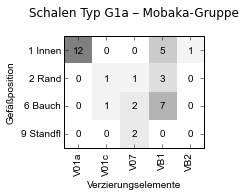

In [10]:
fig = plt.figure()
fig.set_size_inches(5, 2)
plt.imshow(df2_pivot, interpolation='nearest', cmap='binary', alpha = .5)
plt.title('Schalen Typ G1a – Mobaka-Gruppe\n')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df2_pivot.index)), df2_pivot.index)
plt.xticks(range(len(df2_pivot.columns)), df2_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df2_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

In [11]:
# stellte die Pandas-Einstellungen für Plots wieder her
pd.options.display.mpl_style = 'default'
import seaborn as sns
sns.set()
%matplotlib inline